In [1]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
%matplotlib inline

### For Regression

In [113]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

### For Classification

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#### Setting Environment

In [3]:
os.chdir("C:\\Users\\rajka\\Desktop\\Project\\")

In [4]:
dataset = pd.read_csv("hpc_breakdowns.csv")

Visualize first five row of dataset

In [5]:
dataset.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
dataset.tail()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2049275,2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2049276,2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2049277,2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2049278,2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2049279,2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


#### Data Cleaning and Preprocessing

Shape of Dataset

In [7]:
print("The Dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

The Dataset has 2049280 rows and 10 columns


In [8]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Date                   object 
 2   Time                   object 
 3   Global_active_power    float64
 4   Global_reactive_power  float64
 5   Voltage                float64
 6   Global_intensity       float64
 7   Sub_metering_1         float64
 8   Sub_metering_2         float64
 9   Sub_metering_3         float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.3+ MB


#### Droping the duplicates if available

In [10]:
dataset.drop_duplicates()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
2049275,2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [11]:
dataset.shape

(2049280, 10)

After droping the duplicates we can see the shape of dataset is remains same. so we can say that the dataset don't have any duplicates rows.

Finding null values

In [12]:
dataset.isnull().sum()

Unnamed: 0                  0
Date                        0
Time                        0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

Percentage of missing data in different columns.

In [13]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [14]:
missing_value_df

,percent_missing
Unnamed: 0,0.000000
Date,0.000000
Time,0.000000
Global_active_power,0.099694
Global_reactive_power,0.023276
Voltage,0.099108
Global_intensity,0.097644
Sub_metering_1,0.063291
Sub_metering_2,0.059045
Sub_metering_3,0.006295


In above experiment we can see that percentage of data missing in their respective columns is much smaller than the size of data. So, we can drop the null values.

In [15]:
DF = dataset.dropna(how = 'any')

In [16]:
DF.shape

(2040167, 10)

Feature Engineering

In [17]:
DF['DateTime'] = (DF['Date']+' ' +DF['Time']).astype(str)

C:\Users\rajka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Reseting the index according to 'datetime'.

In [18]:
DF = DF.set_index('DateTime')

#### Dropping the columns- [Unnamed 0, Date, Time]

In [19]:
DF = DF.drop(DF.columns[[0,1,2]], axis=1)

##### Making a news columns, 'sub_metering_4' = (GAP*1000/60)-(SM_1+SM_2+SM_3)

In [20]:
values = DF.values
DF['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [21]:
DF.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [22]:
DF.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
DateTime,,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667


In [23]:
DF.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.040167e+06,2.040167e+06,2.040167e+06,2.040167e+06,2.040167e+06,2.040167e+06,2.040167e+06,2.040167e+06
mean,1.091907e+00,1.237295e-01,2.408383e+02,4.628998e+00,1.122089e+00,1.298973e+00,6.460038e+00,9.317353e+00
std,1.057540e+00,1.127202e-01,3.239524e+00,4.445459e+00,6.154082e+00,5.825655e+00,8.437747e+00,9.589701e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428800e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [24]:
DF.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

#### Exploratory Data Analysis (EDA)

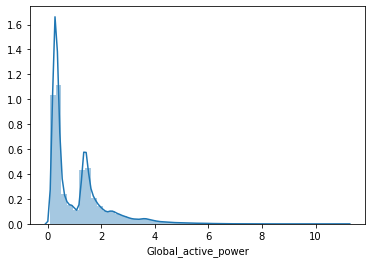

In [25]:
sns.distplot(DF['Global_active_power'])

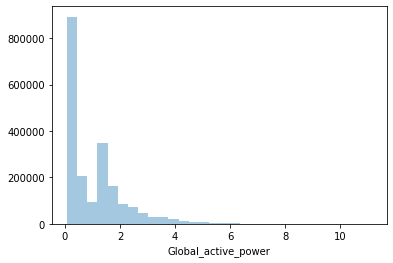

In [26]:
sns.distplot(DF['Global_active_power'],kde=False,bins=30)

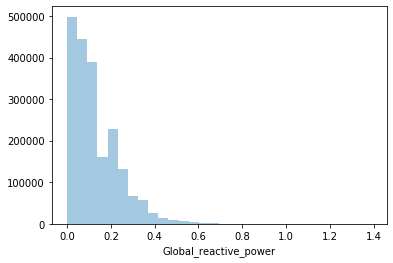

In [27]:
sns.distplot(DF['Global_reactive_power'],kde=False,bins=30)


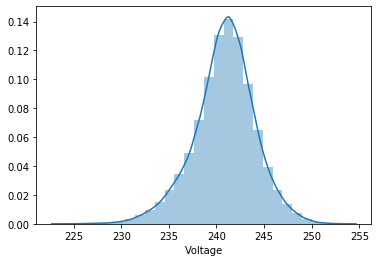

In [28]:
sns.distplot(DF['Voltage'],kde=True,bins=30)

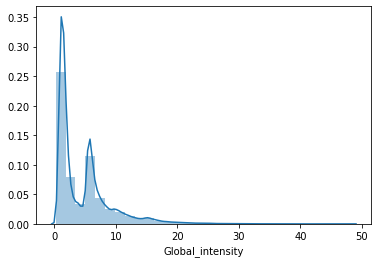

In [29]:
sns.distplot(DF['Global_intensity'],kde=True,bins=30)

In [30]:
DF.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247085,-0.399942,0.998889,0.484245,0.434666,0.638486,0.701375
Global_reactive_power,0.247085,1.000000,-0.112384,0.266182,0.122873,0.139399,0.089649,0.211720
Voltage,-0.399942,-0.112384,1.000000,-0.411537,-0.195944,-0.167500,-0.268214,-0.271592
Global_intensity,0.998889,0.266182,-0.411537,1.000000,0.489142,0.440443,0.626475,0.703250
Sub_metering_1,0.484245,0.122873,-0.195944,0.489142,1.000000,0.054713,0.102569,0.124808
Sub_metering_2,0.434666,0.139399,-0.167500,0.440443,0.054713,1.000000,0.080814,0.085198
Sub_metering_3,0.638486,0.089649,-0.268214,0.626475,0.102569,0.080814,1.000000,0.178731
Sub_metering_4,0.701375,0.211720,-0.271592,0.703250,0.124808,0.085198,0.178731,1.000000


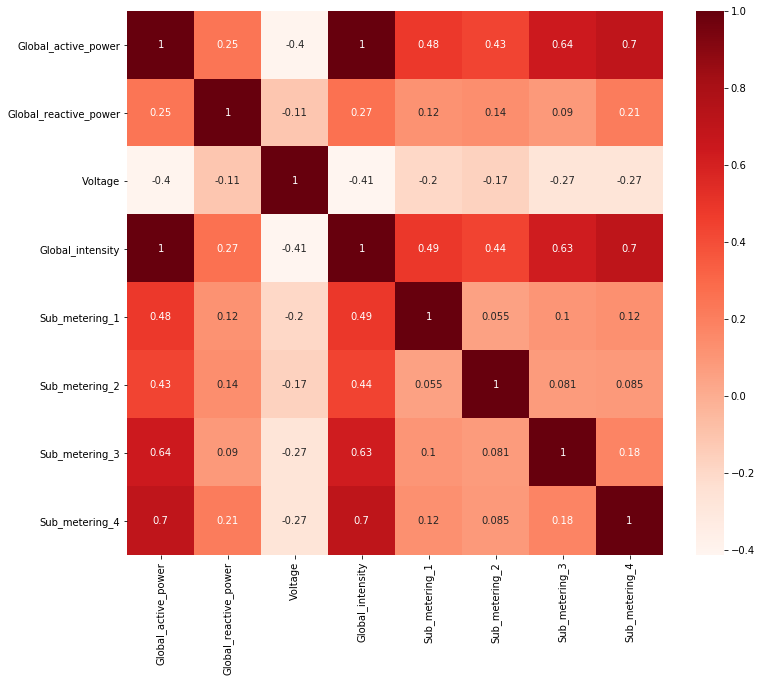

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = DF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

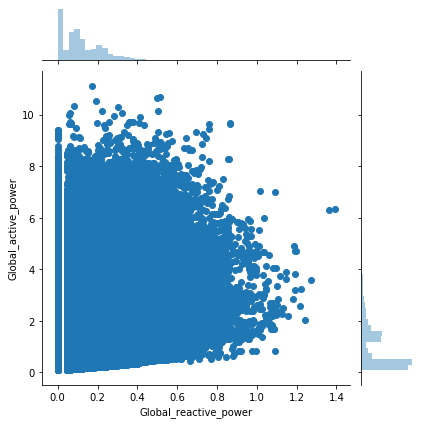

In [32]:
sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = DF , kind = 'scatter')

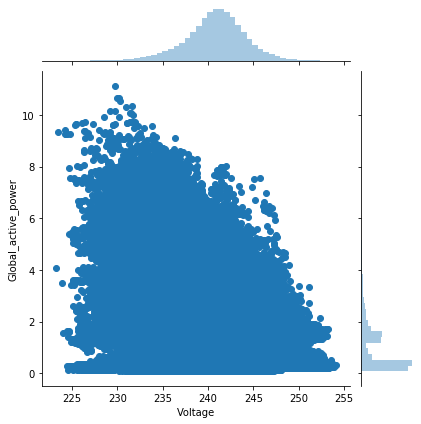

In [33]:
sns.jointplot( x = 'Voltage' , y = 'Global_active_power' , data = DF , kind = 'scatter')


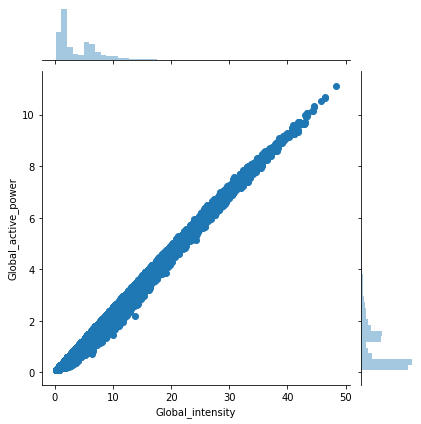

In [34]:
sns.jointplot( x = 'Global_intensity' , y = 'Global_active_power' , data = DF , kind = 'scatter')

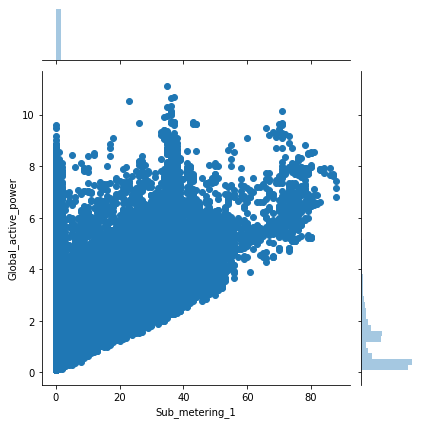

In [35]:
sns.jointplot( x = 'Sub_metering_1' , y = 'Global_active_power' , data = DF , kind = 'scatter')

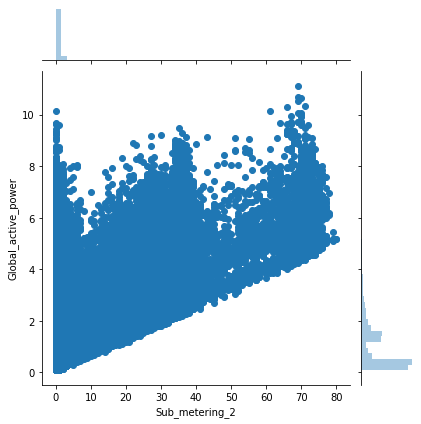

In [36]:
sns.jointplot( x = 'Sub_metering_2' , y = 'Global_active_power' , data = DF , kind = 'scatter')

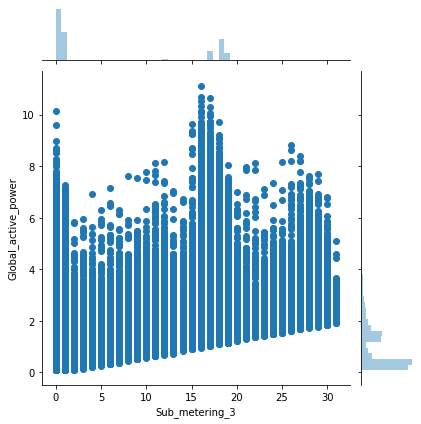

In [37]:
sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = DF , kind = 'scatter')

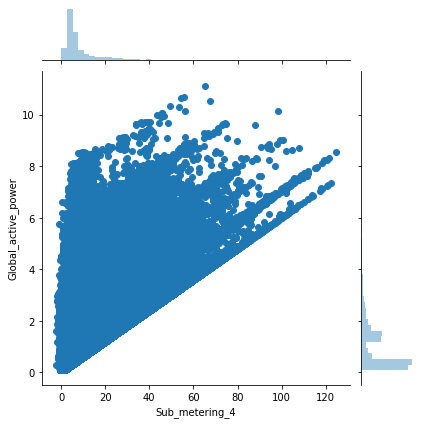

In [38]:
sns.jointplot( x = 'Sub_metering_4' , y = 'Global_active_power' , data = DF , kind = 'scatter')

#### Spliting the dataset into another dataframe and keep 2 lac dataset for cross validation

In [39]:
new_df = DF[:-200000]    # new dataset

In [40]:
new_df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering_4'],
      dtype='object')

In [41]:
cv_data = DF[200000:]    # cross validation dataset

In [42]:
X = new_df.iloc[:,[0,1,2,4,5,6,7]]
y = new_df.iloc[:,3]

#### Split the dataset into train and test

In [43]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

#### Split cross validation data into features and target columns

In [44]:
X_cv = cv_data.iloc[:, [0,1,2,4,5,6,7]]
y_cv = cv_data.iloc[:,3]

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288116, 7)
(552051, 7)
(1288116,)
(552051,)


## Linear Regression Model

In [46]:
lr_model = LinearRegression() # Create the Regressor

In [47]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Y_test predicted result

In [48]:
Y_pred = lr_model.predict(X_test)

In [49]:
mae = metrics.mean_absolute_error(y_test, Y_pred)
mse = metrics.mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2= metrics.r2_score(y_test, Y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.10842376371635629
MSE: 0.028984717925794077
RMSE: 0.17024898803162994
R-Squared: 0.9985794633522762


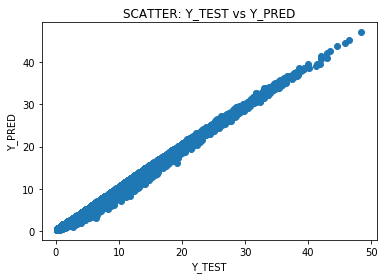

In [50]:
plt.scatter( y_test, Y_pred)
plt.xlabel("Y_TEST") #sequence Values to use for the xticks
plt.ylabel('Y_PRED')
plt.title('SCATTER: Y_TEST vs Y_PRED')
plt.show()

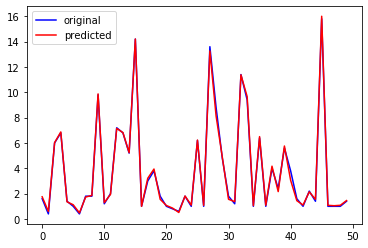

In [51]:
# we'll create sample y and yhat data to evaluate the model by the above metrics.

y = np.array(y_test[0:50])
yhat = Y_pred[0:50]
x = list(range(len(y)))
# We can visualize them in a plot to check the difference visually.

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

#### Y_CV predicted result

In [52]:
y_cv_pred = lr_model.predict(X_cv)

In [53]:
mae = metrics.mean_absolute_error(y_cv, y_cv_pred)
mse = metrics.mean_squared_error(y_cv, y_cv_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_cv, y_cv_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.10619771803175786
MSE: 0.02747230917350583
RMSE: 0.1657477275063095
R-Squared: 0.998522983565969


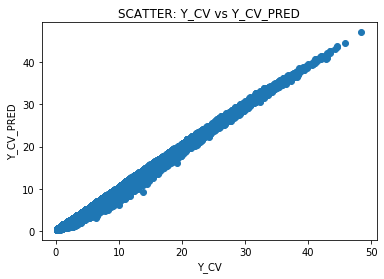

In [54]:
plt.scatter(y_cv,y_cv_pred)
plt.xlabel("Y_CV") #sequence Values to use for the xticks
plt.ylabel('Y_CV_PRED')
plt.title('SCATTER: Y_CV vs Y_CV_PRED')
plt.show()

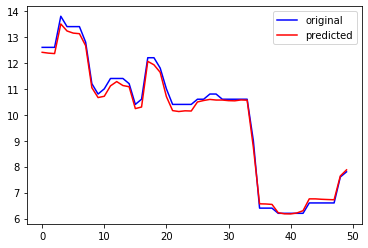

In [55]:
# we'll create sample y and yhat data to evaluate the model by the above metrics.

y = np.array(y_cv[0:50])
yhat = y_cv_pred[0:50]
x = list(range(len(y)))


# We can visualize them in a plot to check the difference visually.

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

## Random Forest model

In [56]:
# Create a random forest regressor

rf_model = RandomForestRegressor(random_state=0)

In [57]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

#### Predict Y_TEST result

In [58]:
y_pred_rf = rf_model.predict(X_test)

In [59]:
mae = metrics.mean_absolute_error(y_test, y_pred_rf)
mse = metrics.mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred_rf)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.059634843438004036
MSE: 0.016910440241417007
RMSE: 0.13004014857503435
R-Squared: 0.9991712218779021


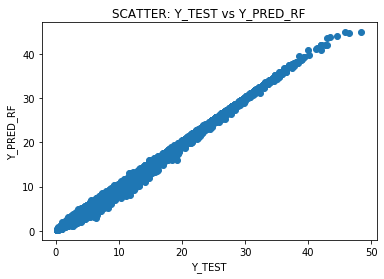

In [60]:
plt.scatter(y_test,y_pred_rf)
plt.xlabel("Y_TEST") #sequence Values to use for the xticks
plt.ylabel('Y_PRED_RF')
plt.title('SCATTER: Y_TEST vs Y_PRED_RF')
plt.show()

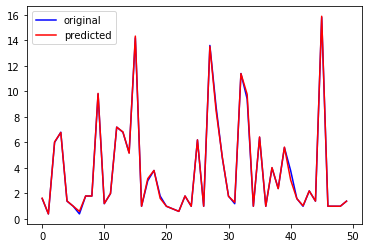

In [61]:
# we'll create sample y and yhat data to evaluate the model by the above metrics.

y = np.array(y_test[0:50])
yhat = y_pred_rf[0:50]
x = list(range(len(y)))
# We can visualize them in a plot to check the difference visually.

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

#### Predict Y_crossValidation result

In [62]:
y_cv_pred_rf = rf_model.predict(X_cv)

In [63]:
mae = metrics.mean_absolute_error(y_cv, y_cv_pred_rf)
mse = metrics.mean_squared_error(y_cv, y_cv_pred_rf)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_cv, y_cv_pred_rf)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.036958486796500996
MSE: 0.007528427554450612
RMSE: 0.08676651171074364
R-Squared: 0.999595242935346


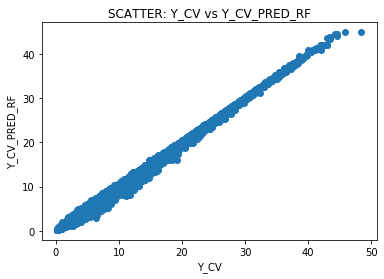

In [64]:
plt.scatter(y_cv,y_cv_pred_rf)
plt.xlabel("Y_CV") #sequence Values to use for the xticks
plt.ylabel('Y_CV_PRED_RF')
plt.title('SCATTER: Y_CV vs Y_CV_PRED_RF')
plt.show()

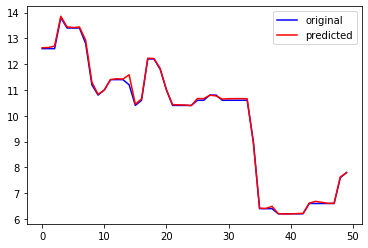

In [65]:
# we'll create sample y and yhat data to evaluate the model by the above metrics.
y = np.array(y_cv[0:50])
yhat = y_cv_pred_rf[0:50]
x = list(range(len(y)))
# We can visualize them in a plot to check the difference visually.

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

## Lasso Regression Model

In [66]:
best_alpha = 0.00099   #define own alpha

# Create Lasso Regressor
la_model = Lasso(alpha=best_alpha, max_iter=50000)

In [67]:
la_model.fit(X_train,y_train)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Predict Y_TEST result

In [68]:
y_pred_la = la_model.predict(X_test)

In [69]:
mae = metrics.mean_absolute_error(y_test, y_pred_la)
mse = metrics.mean_squared_error(y_test, y_pred_la)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred_la)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.10848643059109567
MSE: 0.029053893012250837
RMSE: 0.170452025544582
R-Squared: 0.998576073091737


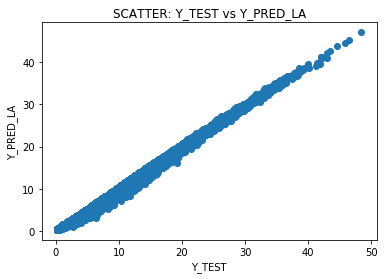

In [70]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_la)
plt.xlabel("Y_TEST") #sequence Values to use for the xticks
plt.ylabel('Y_PRED_LA')
plt.title('SCATTER: Y_TEST vs Y_PRED_LA')
plt.show()

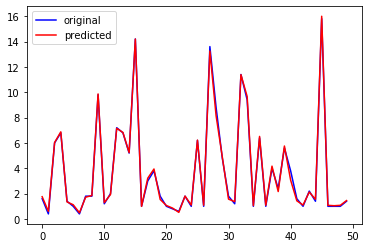

In [71]:
y = np.array(y_test[0:50])
yhat = y_pred_la[0:50]
x = list(range(len(y)))


# We can visualize them in a plot to check the difference visually.

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

#### Predict Y_crossvalidation result

In [72]:
y_cv_pred_la = la_model.predict(X_cv)

In [73]:
mae = metrics.mean_absolute_error(y_cv, y_cv_pred_la)
mse = metrics.mean_squared_error(y_cv, y_cv_pred_la)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_cv, y_cv_pred_la)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.10640906207229589
MSE: 0.02760234269555733
RMSE: 0.16613952779383157
R-Squared: 0.9985159924663919


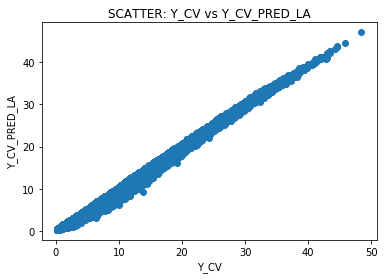

In [74]:
import matplotlib.pyplot as plt
plt.scatter(y_cv,y_cv_pred_la)
plt.xlabel("Y_CV") #sequence Values to use for the xticks
plt.ylabel('Y_CV_PRED_LA')
plt.title('SCATTER: Y_CV vs Y_CV_PRED_LA')
plt.show()

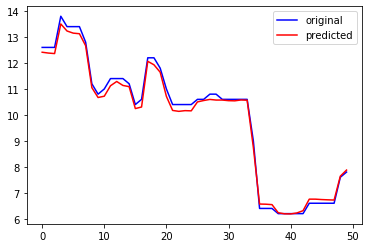

In [75]:
y = np.array(y_cv[0:50])
yhat = y_cv_pred_la[0:50]
x = list(range(len(y)))


# We can visualize them in a plot to check the difference visually.

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

# Preparing data for Classification problem

##### Setting the Environment.

In [127]:
os.chdir("C:\\Users\\rajka\\Desktop\\Project\\")

##### Load Dataset

In [128]:
data = pd.read_csv("hpc_breakdowns.csv")

In [129]:
data.shape

(2049280, 10)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Date                   object 
 2   Time                   object 
 3   Global_active_power    float64
 4   Global_reactive_power  float64
 5   Voltage                float64
 6   Global_intensity       float64
 7   Sub_metering_1         float64
 8   Sub_metering_2         float64
 9   Sub_metering_3         float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.3+ MB


#### Droping the rows having null values

In [131]:
data = data.dropna(how = 'any')

In [132]:
data.shape

(2040167, 10)

#### Make new Column, addition columns Date and Time

In [133]:
data['DateTime'] = (data['Date']+' ' +data['Time']).astype(str)

##### Reseting the index

In [134]:
data = data.set_index('DateTime')

##### Droping the columns [ unnamed 0, Date, Time], because we don't need it.

In [135]:
data = data.drop(data.columns[[0,1,2]], axis=1)

#### Making new column 'sub_metering_4'

In [136]:
values = data.values
data['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

##### convert the 'Global_intensity' column into "TRUE" and "FALSE".
##### TRUE if GI >=15
##### FALSE if GI <15

In [137]:
data['Global_intensity'] = data['Global_intensity'].apply(lambda x : True if x >=15 else False)

In [138]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
DateTime,,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,True,0.0,1.0,17.0,52.266667
16/12/2006 17:25:00,5.360,0.436,233.63,True,0.0,1.0,16.0,72.333333
16/12/2006 17:26:00,5.374,0.498,233.29,True,0.0,2.0,17.0,70.566667
16/12/2006 17:27:00,5.388,0.502,233.74,True,0.0,1.0,17.0,71.800000
16/12/2006 17:28:00,3.666,0.528,235.68,True,0.0,1.0,17.0,43.100000


In [139]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering_4'],
      dtype='object')

In [140]:
data['Global_intensity'].value_counts()

False    1958270
True       81897
Name: Global_intensity, dtype: int64

#### split the data into new_data and keep 200000 data for cross validation.

In [141]:
new_data = data[0:-200000]
cv_data = data[-200000:]

In [142]:
new_data.shape

(1840167, 8)

In [143]:
cv_data.shape

(200000, 8)

In [144]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840167 entries, 16/12/2006 17:24:00 to 1/7/2010 23:59:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       bool   
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Sub_metering_4         float64
dtypes: bool(1), float64(7)
memory usage: 114.1+ MB


In [145]:
X = new_data.iloc[:,[0,1,2,4,5,6,7]]  # Features
y = new_data.iloc[:,3]                # Target

In [146]:
X_cv = cv_data.iloc[:,[0,1,2,4,5,6,7]]  # Features
y_cv = cv_data.iloc[:,3]                # Target

##### spliting the new_data into train and test.

In [147]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288116, 7)
(552051, 7)
(1288116,)
(552051,)


## Naive Bayes Classifier

In [149]:
# import NB
nv = GaussianNB() # create a classifier 

In [150]:
nv.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
y_pred = nv.predict(X_test) # store the prediction data

In [152]:
print("The Accuracy of Test data is : ",accuracy_score(y_test,y_pred))

The Accuracy of Test data is :  0.9632769436157167


In [153]:
y_cv_pred = nv.predict(X_cv) # Predicting the cross_validation data

In [154]:
print("The Accuracy of Cross_Validation Data is : ", accuracy_score(y_cv,y_cv_pred))

The Accuracy of Cross_Validation Data is :  0.976825


## Logistic Regression Classifier

In [183]:
model = LogisticRegression(solver='liblinear', random_state=0) # Creating the model

In [156]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
# Predicting Test Accuracy
y_pred = model.predict(X_test)

In [158]:
print("The Accuracy of Test Data is : ",accuracy_score(y_test,y_pred))

The Accuracy of Test Data is :  0.9983660929877856


In [159]:
# Predicting the CV Accuracy
y_cv_pred = model.predict(X_cv)
print("The Accuracy of CV data is : ",accuracy_score(y_cv,y_cv_pred))

The Accuracy of CV data is :  0.998705


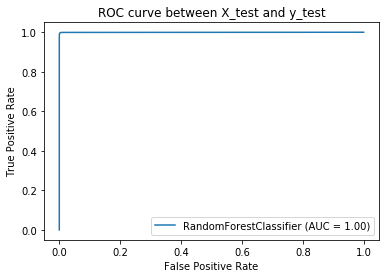

In [184]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.title("ROC curve between X_test and y_test")
plt.show() 

## Decision Tree Classifier

In [160]:
# Creating the model
model = tree.DecisionTreeClassifier()

In [161]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [162]:
# Predicting the Test accuracy
y_pred = model.predict(X_test)

In [163]:
print("The Accuracy of Test data is : ",accuracy_score(y_test, y_pred))

The Accuracy of Test data is :  0.9988117039911167


In [164]:
# Predicting the CV data
y_cv_pred = model.predict(X_cv)
print("The Accuracy of CV data is : ",accuracy_score(y_cv,y_cv_pred))

The Accuracy of CV data is :  0.99903


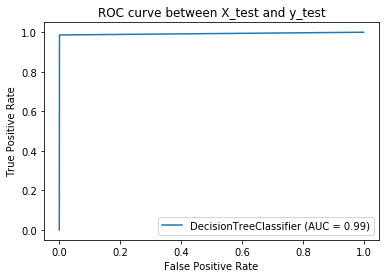

In [182]:
metrics.plot_roc_curve(model, X_test, y_test) 
plt.title("ROC curve between X_test and y_test")
plt.show() 

## Random Forest Classifier

In [165]:
#Create Classifier
clf=RandomForestClassifier(n_estimators=100)

In [166]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [167]:
# Predicting the Test Accuracy
y_pred = clf.predict(X_test)

In [168]:
print("The Accuracy of Test Data is : ",accuracy_score(y_test, y_pred))

The Accuracy of Test Data is :  0.9992138407502206


In [169]:
# Predicting the CV Accuracy
y_cv_pred = clf.predict(X_cv)

In [170]:
print("The Accuracy of CV data is : ",accuracy_score(y_cv,y_cv_pred))

The Accuracy of CV data is :  0.999325


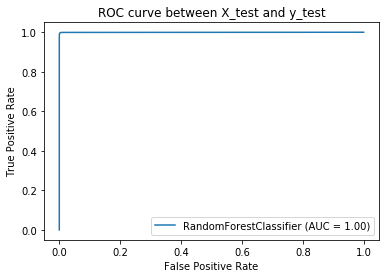

In [177]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.title("ROC curve between X_test and y_test")
plt.show()  

In [179]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_cv, y_cv_pred, labels=[True, False]).ravel()

array([  3747,     86,     49, 196118], dtype=int64)

In [181]:
print(classification_report(y_cv, y_cv_pred, labels=[True, False]))

              precision    recall  f1-score   support

        True       0.99      0.98      0.98      3833
       False       1.00      1.00      1.00    196167

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

